데이터가 일반화 되어있다.  
다른 데이터 볼때 도움 많이 될것.  
화이팅..

In [1]:
train_df <- read.csv("Rdata/Titanic_train.csv")
head(train_df)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


In [2]:
tail(train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39,0,5,382652,29.125,,Q
887,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.000,,S
888,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.000,B42,S
889,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NA,1,2,W./C. 6607,23.450,,S
890,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.000,C148,C
891,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.750,,Q


In [3]:
str(train_df)
# 얘는 서머리 하나마나.

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 191 358 277 16 559 520 629 417 581 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


 Embarked   : Factor w/ 4 levels "","C","Q","S" 에서 ""<- 는 이상치 찾아가서 수정해줘야함.

### 컬럼 내용 확인
- Survived : 생존여부, 0=사망, 1=생존 (유니크나 테이블로 확인해봐야함) <- Target col이구나!
- Pclass : 티켓등급, 1=1등급 , 2=2등급, 3=3등급  
(타이타닉 배를 알아야함. 타이타닉 구조도 봐야함.    
3등급이 끝인가? , 역사정보도 도입해서 분석할수도 있음, 민족성 데이터도 분석할수 있다.(<==민족성 까지 한사람이 사망자수를 100% 맞췄대 ㄷㄷ.),이시대에는 계급이 존재하던 시대라서 1등급은 작위가 있어야 탈수 있었던 시대였음 2등급은 작위없는 중상층,)
- SibSp : 함께 탑승한 형제, 자매, 배우자의 수
- Parch : 함께 탑승한 부모, 자식의 수
- Fare : 운임(짐칸 비용)
- Cabin :  객실 번호
- Embarked : 탑승 항구, C =Cersbourg(프랑스), Q=Queestown(아일랜드), S=Southampton(영국)

In [4]:
# 각 컬럼별 NA 확인
sum(is.na(train_df))

[1] 177

In [5]:
# 컬럼별로 sum구하는법
colSums(is.na(train_df))

PassengerId    Survived      Pclass        Name         Sex         Age 
          0           0           0           0           0         177 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
          0           0           0           0           0           0

Age만 177개

In [6]:
177/891
891 -177

[1] 0.1986532

[1] 714

약 20퍼센트가 NA, 지금당장 Age에 데이터 채우기가 어렵다.  
데이터는 버리는것보다 어떻게든 쓰는게 좋다.  
891개에서 177개를 빼고 나머지를 사용하는것도 괜찮겠다.(하나씩 정리하면서)

In [7]:
# train_df$Age가 NA인것 뺴고 데이터셋 만들기
subset(train_df, !is.na(train_df$Age))

#row 갯수가 714개가 맞나 확인해보기
nrow(subset(train_df, !is.na(train_df$Age)))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
7,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
9,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S
10,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C
11,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7000,G6,S


[1] 714

In [8]:
# Survived 기준으로 Dataset 정렬

library(dplyr) # 새로 rownames를 받아서 정렬해줘서 다시 rownames를 정리할 필요는 없어.
train_df <- arrange(train_df, Survived)
print(head(train_df))


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



  PassengerId Survived Pclass                           Name  Sex Age SibSp
1           1        0      3        Braund, Mr. Owen Harris male  22     1
2           5        0      3       Allen, Mr. William Henry male  35     0
3           6        0      3               Moran, Mr. James male  NA     0
4           7        0      1        McCarthy, Mr. Timothy J male  54     0
5           8        0      3 Palsson, Master. Gosta Leonard male   2     3
6          13        0      3 Saundercock, Mr. William Henry male  20     0
  Parch    Ticket    Fare Cabin Embarked
1     0 A/5 21171  7.2500              S
2     0    373450  8.0500              S
3     0    330877  8.4583              Q
4     0     17463 51.8625   E46        S
5     1    349909 21.0750              S
6     0 A/5. 2151  8.0500              S


In [9]:
#정렬된 크기 확인하기.
#가끔 줄수가 있어서 확인해주기
dim(train_df)

[1] 891  12

# Target Column : Servived 분석및 확인
- Servived 는 기본적으로 0,1로 구성되어있다

In [10]:
# 0,1 로 구분되어있는지 일단확인후 비율이 1:1일때가 가장 좋은데 그런 데이터는 거의 없다.
# 6:4 까지는 해볼만해,
table(train_df$Survived)


  0   1 
549 342 

In [11]:
# Survived의 생존과 사망 Count확인 및 비율 계산하기.

#사망자수
nrow(subset(train_df, Survived == 0))
table(train_df$Survived)[1]
#생존자수
nrow(subset(train_df, Survived == 1))
table(train_df$Survived)[2]
#생존자수의 비율
#애매해 38%
nrow(subset(train_df, Survived == 1))/nrow(train_df)
as.integer(table(train_df$Survived)[2])/nrow(train_df)

[1] 549

0 
549

[1] 342

1 
342

[1] 0.3838384

[1] 0.3838384

타겟컬럼은 차이가 있으면 안좋고 일정해야함  
피쳐컬럼은 차이가 많이나면 좋다

## 타이타닉호 생존률 Pie Chart 만들기!
- Pie Chart는 비율에 관한 내용

In [12]:
library(plotrix)

In [13]:
#생존자와 사망자수
death <- sum(train_df$Survived == 0 );death
live <- sum(train_df$Survived == 1 );live

SurvivedVector <- c(death,live)
SurvivedVector

[1] 549

[1] 342

[1] 549 342

In [14]:
ratio <- round(SurvivedVector/sum(SurvivedVector) * 100 ,2);ratio
label <- paste(c("사망,생존"),"\n",ratio,"%");label

[1] 61.62 38.38

[1] "사망,생존 \n 61.62 %" "사망,생존 \n 38.38 %"

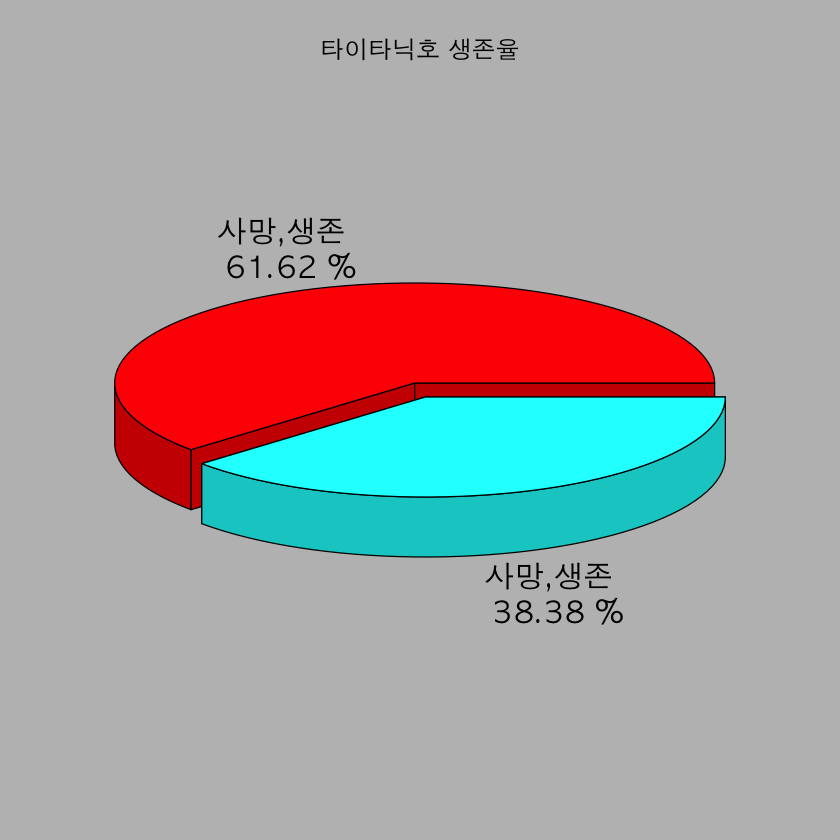

In [15]:
par(family = "AppleGothic" ,bg="gray")
options(warn = -1)

pie3D(SurvivedVector,
     main = "타이타닉호 생존율",
      labels = label,
      explode = 0.05
     )

# 생존수와 사망수 막대 그래프 그리기
- 막대그래프는 table와 가장 친함.

In [16]:
# 이거슨 뻘짓이였다..

#deathSum <- sum(train_df$Survived == 0); deathSum 
#liveSum  <- sum(train_df$Survived == 1); liveSum  

#SurvivedVector2 <- c(deathSum,liveSum); SurvivedVector2

In [17]:
#막대그래프는 table와 가장 친함.

table(train_df$Survived)


  0   1 
549 342 

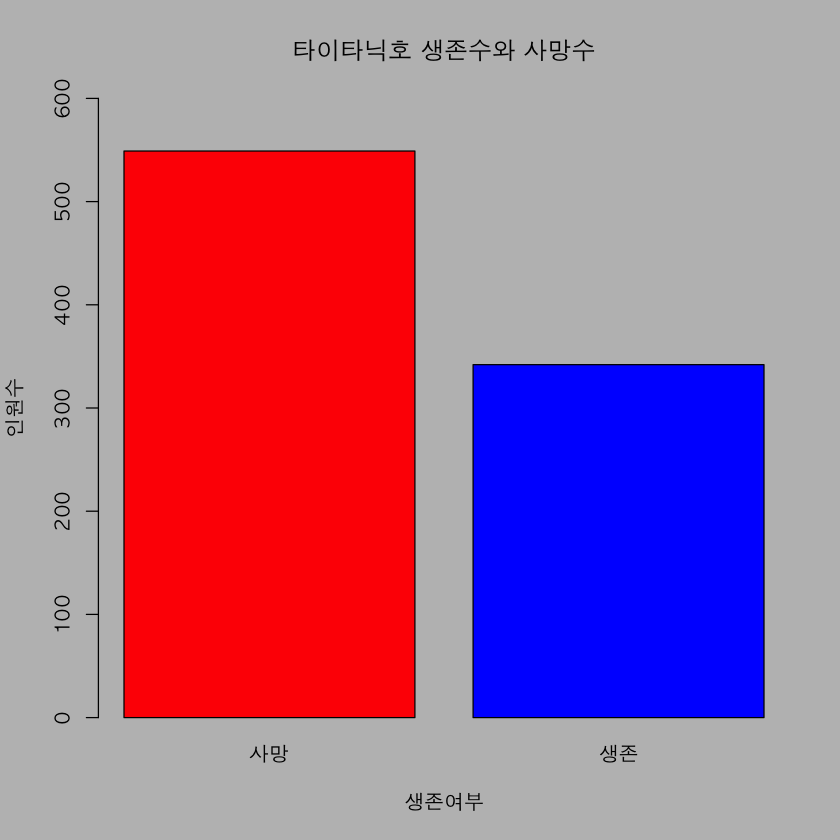

In [18]:
par(family = "AppleGothic" ,bg="gray")
options(warn = -1)

barplot(table(train_df$Survived),
        main = '타이타닉호 생존수와 사망수',
        col = c('red','blue'),
        ylim = c(0,600),
        xlab = '생존여부',
        ylab = '인원수',
        names = c('사망', '생존')      
       )

> Target Column으로 Survived로 선정

---
# Feature Column 찾기

In [19]:
head(train_df,3)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


특징이 있는 컬럼중에  
확실히 본것들중에 가장 작은것들, 쉬운것들 먼저 사용하는게 좋다 ==> Sex컬럼 사용

### Sex 컬럼 확인

In [20]:
# Sex 컬럼 분류 확인
# 그냥 보면 안되고 Levels를 눌러서 확인하기!
unique(train_df$Sex)

[1] male   female
Levels: female male

In [21]:
# 여성과 남성의 인원 확인
femaleCount <- nrow(subset(train_df, Sex == 'female')); femaleCount
maleCount <- nrow(subset(train_df, Sex == 'male')); maleCount

[1] 314

[1] 577

데이터 차이가 나네 하지만    
뭐에대한 피쳐가 차이나는지 확인해야함

> subset == SQL의 select와 동일함

In [22]:
#여성의 생존수와 사망수
#sum(subset(train_df$Survived, train_df$Sex =='female'))
fs <- nrow(subset(train_df, (Sex == 'female' & (Survived == 0))));fs
fd <- nrow(subset(train_df, (Sex == 'female' & (Survived == 1))));fd

[1] 81

[1] 233

In [23]:
#남성의 생존수와 사망수
#sum(subset(train_df$Survived, train_df$Sex =='male'))
ms <- nrow(subset(train_df, (Sex == 'male' & (Survived == 0))));ms
md <- nrow(subset(train_df, (Sex == 'male' & (Survived == 1))));md

[1] 468

[1] 109

In [24]:
# 여성의 생존율과 사망율
round(fs / femaleCount * 100,2)
round(fd /femaleCount * 100,2)

cat("여성의 생존율 :",round(fs / femaleCount * 100,2),"%","\n")
cat("여성의 사망율 :",round(fd / femaleCount * 100,2),"%","\n")

[1] 25.8

[1] 74.2

여성의 생존율 : 25.8 % 
여성의 사망율 : 74.2 % 


In [25]:
# 남성의 생존율과 사망율
round(ms / maleCount * 100,2)
round(md / maleCount * 100,2)

cat("남성의 생존율 :",round(ms / maleCount  * 100,2),"%","\n")
cat("남성의 사망율 :",round(md / maleCount  * 100,2),"%","\n")

[1] 81.11

[1] 18.89

남성의 생존율 : 81.11 % 
남성의 사망율 : 18.89 % 


> Sex컬럼은 Feature로 적합  
>[Survived] <- [Sex]

Feature 는 최소 3개는 있어야함.

#생존자와 사망자수
death <- sum(train_df$Survived == 0 );death
live <- sum(train_df$Survived == 1 );live

SurvivedVector <- c(death,live)
SurvivedVector
ratio <- round(SurvivedVector/sum(SurvivedVector) * 100 ,2);ratio
label <- paste(c("사망,생존"),"\n",ratio,"%");label

par(family = "AppleGothic" ,bg="gray")
options(warn = -1)

pie3D(SurvivedVector,
     main = "타이타닉호 생존율",
      labels = label,
      explode = 0.05
     )

In [26]:
# 타이타닉호 여성 생존율

In [27]:
fdeath <- fs
flive <- fd
fVector <-c(fdeath,flive);fVector

[1]  81 233

In [28]:
fratio <-round(fVector / femaleCount * 100,2) ;fratio
flabel <- paste(c("사망","생존"),"\n",fratio,"%");flabel

[1] 25.8 74.2

[1] "사망 \n 25.8 %" "생존 \n 74.2 %"

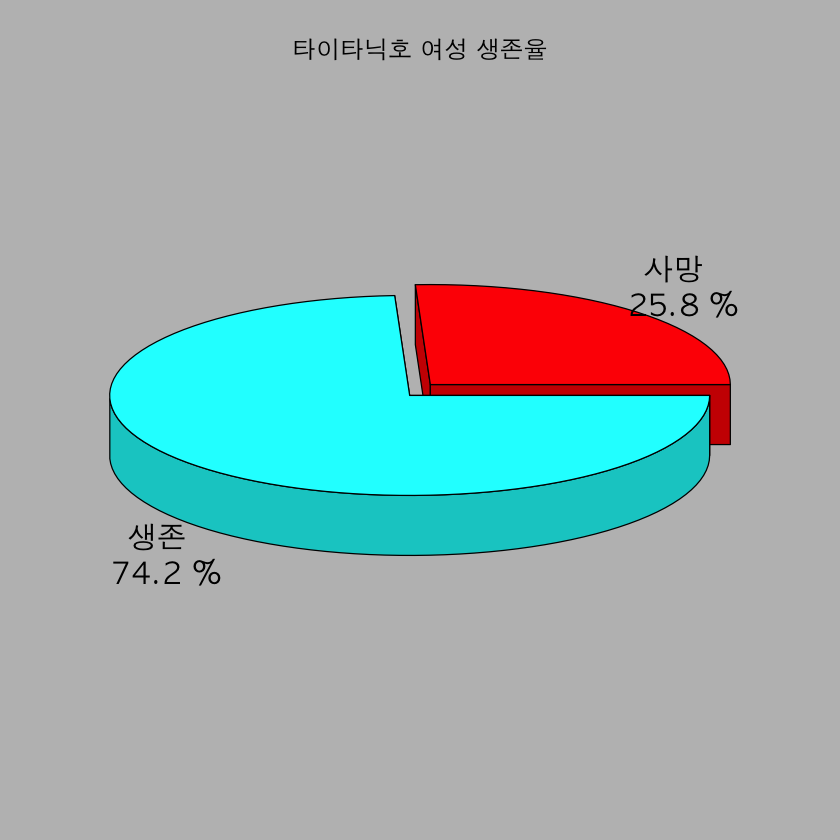

In [29]:
par(family = "AppleGothic" ,bg="gray")
options(warn = -1)

pie3D(fVector,
     main = "타이타닉호 여성 생존율",
      labels = flabel,
      explode = 0.05
     )

In [30]:
# 타이타닉호 남성 생존율

In [31]:
mdeath <- ms
mlive <- md
mVector <-c(mdeath,mlive);mVector
mratio <-round(mVector / maleCount * 100,2) ;mratio
mlabel <- paste(c("사망","생존"),"\n",mratio,"%");mlabel

[1] 468 109

[1] 81.11 18.89

[1] "사망 \n 81.11 %" "생존 \n 18.89 %"

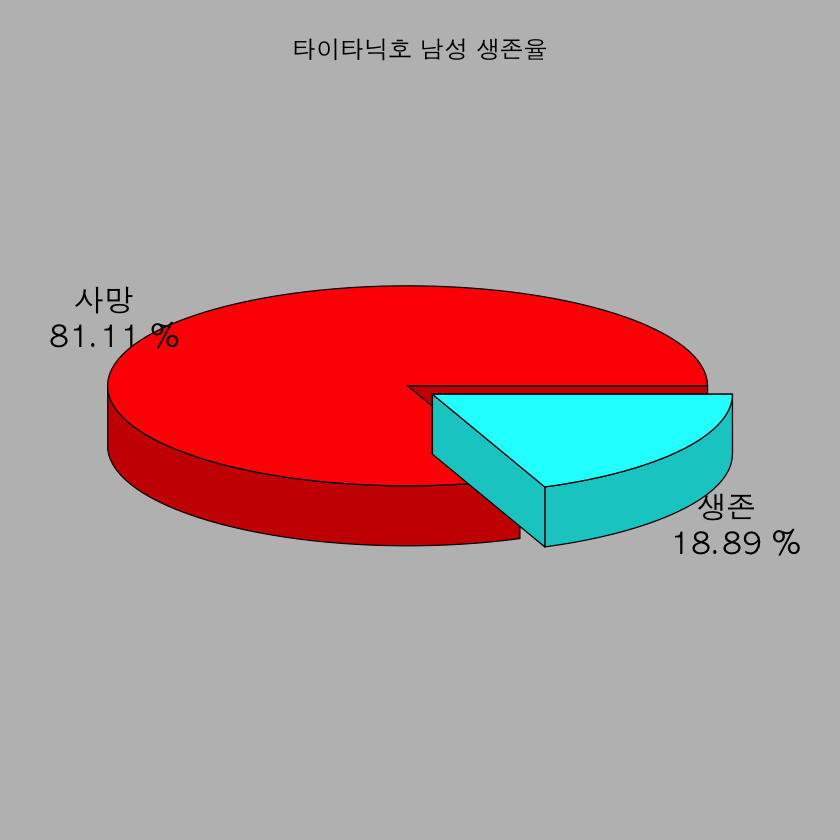

In [32]:
par(family = "AppleGothic" ,bg="gray")
options(warn = -1)

pie3D(mVector,
     main = "타이타닉호 남성 생존율",
      labels = mlabel,
      explode = 0.05
     )

In [33]:
# 성별 승선 인원수
table(train_df$Sex)


female   male 
   314    577 

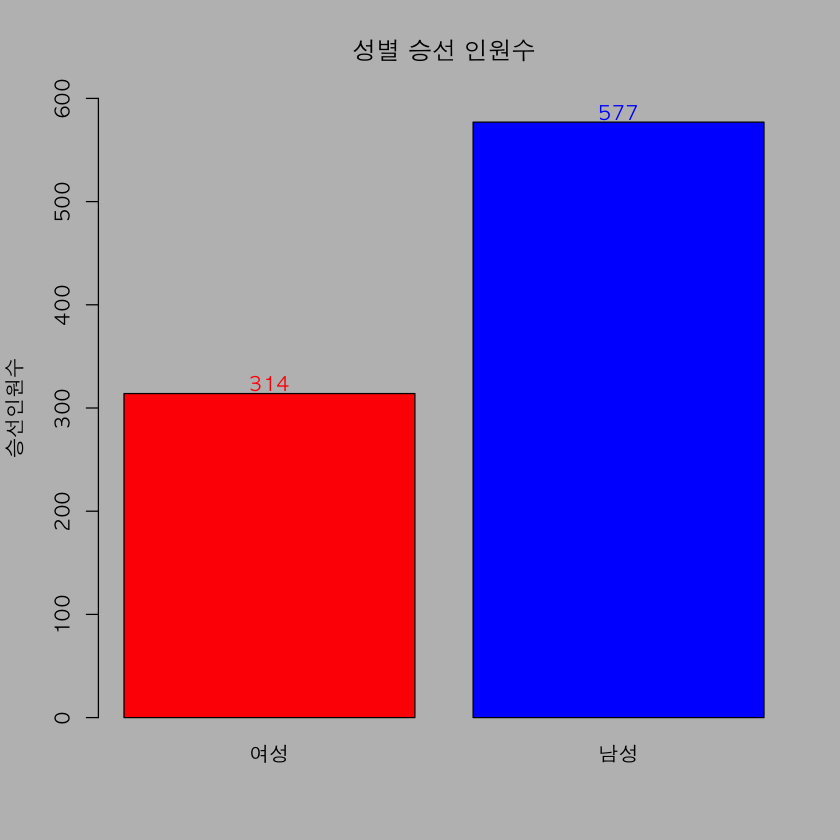

In [34]:
par(family = "AppleGothic" ,bg="gray")
options(warn = -1)


barplot(table(train_df$Sex),
        main = '성별 승선 인원수',
        col = c('red','blue'),
        ylim = c(0,600),
        ylab = '승선인원수',
        names = c('여성', '남성')
    )

text(0.7,femaleCount + 10,femaleCount,col = 'red')
text(1.9,maleCount + 10,maleCount,col = 'blue')

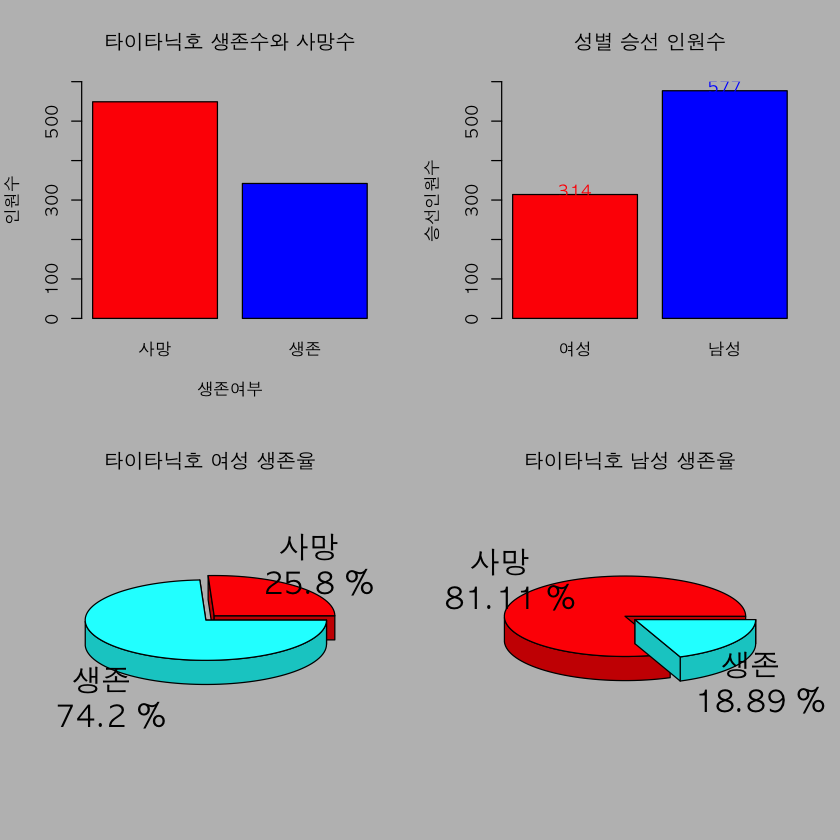

In [35]:
par(mfcol = c(2,2))
par(family = "AppleGothic" ,bg="gray")
options(warn = -1)

barplot(table(train_df$Survived),
        main = '타이타닉호 생존수와 사망수',
        col = c('red','blue'),
        ylim = c(0,600),
        xlab = '생존여부',
        ylab = '인원수',
        names = c('사망', '생존')      
       )


pie3D(fVector,
     main = "타이타닉호 여성 생존율",
      labels = flabel,
      explode = 0.05
     )


barplot(table(train_df$Sex),
        main = '성별 승선 인원수',
        col = c('red','blue'),
        ylim = c(0,600),
        ylab = '승선인원수',
        names = c('여성', '남성')
    )
text(0.7,femaleCount + 10,femaleCount,col = 'red')
text(1.9,maleCount + 10,maleCount,col = 'blue')

pie3D(mVector,
     main = "타이타닉호 남성 생존율",
      labels = mlabel,
      explode = 0.05
     )





In [36]:
head(train_df)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S


---
### 티겟 등급 분석

In [37]:
table(train_df$Pclass)


  1   2   3 
216 184 491 

데이터가 차이가 나니까 피쳐랑 사용할수 있지 않을까  
Survived랑 연관 시켜서 확인해보자!

In [38]:

#1등 객실의 여성 생존수
fs_Pclass_Count <-
 nrow(subset(train_df, (Sex == 'female' & (Survived == 1) & (Pclass == 1))));fs_Pclass_Count

#1등 객실의 여성 사망수
fd_Pclass_Count <-
 nrow(subset(train_df, (Sex == 'female' & (Survived == 0) & (Pclass == 1))));fd_Pclass_Count

#1등 객실의 여성 탑승인원수
f_Pclass_Count <-
 nrow(subset(train_df, (Sex == 'female'  & (Pclass == 1))));f_Pclass_Count


#1등 객식의 여성 생존률
round(fs_Pclass_Count/f_Pclass_Count *100,2)

[1] 91

[1] 3

[1] 94

[1] 96.81

In [39]:
train_df2 <- train_df
train_df2$Sex <- as.numeric(train_df$Sex)
train_df2

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",2,22,1,0,A/5 21171,7.2500,,S
5,0,3,"Allen, Mr. William Henry",2,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",2,NA,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",2,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",2,2,3,1,349909,21.0750,,S
13,0,3,"Saundercock, Mr. William Henry",2,20,0,0,A/5. 2151,8.0500,,S
14,0,3,"Andersson, Mr. Anders Johan",2,39,1,5,347082,31.2750,,S
15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",1,14,0,0,350406,7.8542,,S
17,0,3,"Rice, Master. Eugene",2,2,4,1,382652,29.1250,,Q
19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)",1,31,1,0,345763,18.0000,,S


In [40]:
#출력 한줄로 바꾸기
#for문 돌면서 if문 돌면서 Vector생성하기
a <- c()

for(j in 1:2){
    
    for(i in 1:3){
    psl <- nrow(subset(train_df2, (Sex == j & (Survived == 1) & (Pclass == i))))
    psd <-  nrow(subset(train_df2, (Sex == j & (Survived == 0) & (Pclass == i))))
    psc <-  nrow(subset(train_df2, (Sex == j  & (Pclass == i))))

        if(j == 1){
           fpl <- round(psl/psc *100,2)
           a <- append(a,fpl )         
         cat(i,"등 객실의 여성 생존율은",psl,"/",psc,",",round(psl/psc *100,2),"%","\n")   
        }else{
            mpl <- round(psl/psc *100,2)
            a <- append(a,mpl ) 
            cat(i,"등 객실의 남성 생존율은",psl,"/",psc,",",round(psl/psc *100,2),"%","\n")
        }      
    }
    cat("-----------------------------------------------","\n")
 
}

a


1 등 객실의 여성 생존율은 91 / 94 , 96.81 % 
2 등 객실의 여성 생존율은 70 / 76 , 92.11 % 
3 등 객실의 여성 생존율은 72 / 144 , 50 % 
----------------------------------------------- 
1 등 객실의 남성 생존율은 45 / 122 , 36.89 % 
2 등 객실의 남성 생존율은 17 / 108 , 15.74 % 
3 등 객실의 남성 생존율은 47 / 347 , 13.54 % 
----------------------------------------------- 


[1] 96.81 92.11 50.00 36.89 15.74 13.54

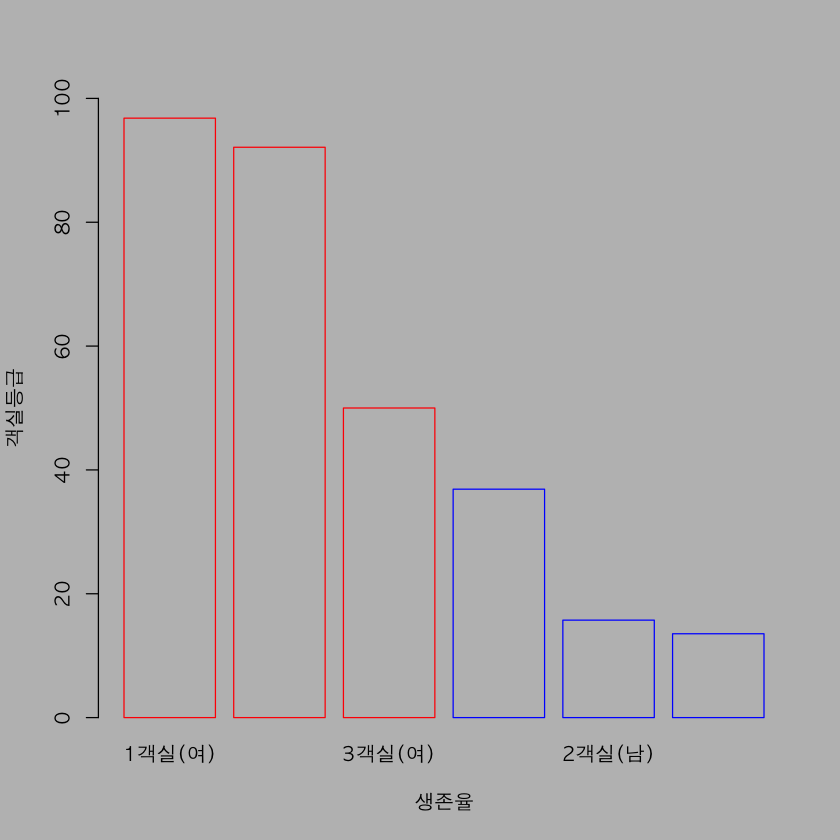

In [41]:

par(family = "AppleGothic" ,bg="gray")
options(warn = -1)

barplot(a,
       # main = '타이타닉호 생존수와 사망수',
       # col = c('red','blue'),
        ylim = c(0,100),
        xlab = '생존율',
        ylab = '객실등급',
        names = c('1객실(여)', '2객실(여)','3객실(여)','1객실(남)','2객실(남)','3객실(남)') ,
        border = c(rep("red", 3), rep("blue", 3))
       )

여성은 1,2 등이 친하고 남성은 2,3등이 친함  
시대상? 을 볼수 있어

> [Survived] <- [Sex,Pclass]

# Embarked(항구의 위치)

In [42]:
str(train_df)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 5 6 7 8 13 14 15 17 19 ...
 $ Survived   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Pclass     : int  3 3 3 1 3 3 3 3 3 3 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 16 559 520 629 734 29 847 687 846 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 2 2 2 2 2 2 1 2 1 ...
 $ Age        : num  22 35 NA 54 2 20 39 14 2 31 ...
 $ SibSp      : int  1 0 0 0 3 0 1 0 4 1 ...
 $ Parch      : int  0 0 0 0 1 0 5 0 1 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 473 276 86 396 536 334 414 481 302 ...
 $ Fare       : num  7.25 8.05 8.46 51.86 21.07 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 1 1 131 1 1 1 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 4 3 4 4 4 4 4 3 4 ...


In [43]:
table(train_df$Embarked)


      C   Q   S 
  2 168  77 644 

In [44]:
# 빈칸의 데이터 찾기
unique(train_df$Embarked)

subset(train_df, Embarked == "")
#둘의 관계는 같이 방쓰는 모르는사람 ㅋㅋ

[1] S Q C  
Levels:  C Q S

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
577,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,
868,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,


In [45]:
table(train_df$Survived)
table(train_df$Embarked)


  0   1 
549 342 


      C   Q   S 
  2 168  77 644 

---
그냥 한번 보기 찾는 방법 알려주려고

In [46]:
# 제일 많은 운임을 지불한 사람
subset(train_df, Fare == max(train_df$Fare))
# 평균 운임지불금액
mean(train_df$Fare)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
639,259,1,1,"Ward, Miss. Anna",female,35,0,0,PC 17755,512.3292,,C
814,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36,0,1,PC 17755,512.3292,B51 B53 B55,C
836,738,1,1,"Lesurer, Mr. Gustave J",male,35,0,0,PC 17755,512.3292,B101,C


[1] 32.20421

---

In [47]:
# 항구별 탑승인원을 구하여 가장 많은 탑승인원의 항구로 결정
# S항구 탑승인원
nrow(subset(train_df, Embarked =="S"))
sum(train_df$Embarked =="S")
# C항구 탑승인원
nrow(subset(train_df, Embarked =="C"))
sum(train_df$Embarked =="C")
# Q항구 탑승인원
nrow(subset(train_df, Embarked =="Q"))
sum(train_df$Embarked =="Q")

[1] 644

[1] 644

[1] 168

[1] 168

[1] 77

[1] 77

In [48]:
table(train_df$Survived)
table(train_df$Embarked)


  0   1 
549 342 


      C   Q   S 
  2 168  77 644 

거의 S항구에서 타네!  
> 빈값 항구를 S항구로 변경

In [49]:
# 연습을 위한 데이터셋 복제
train_df_T <- train_df

In [50]:
# 빈칸 항구 찾기 - 1
subset(train_df_T, Embarked == "")

# 빈칸 항구 찾기 - 2
# 파이썬에서 많이 사용하는 방법
train_df_T[train_df_T$Embarked == "", ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
577,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,
868,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
577,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,
868,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,


In [51]:
table(train_df_T$Survived)
table(train_df_T$Embarked)
table(train_df$Survived)
table(train_df$Embarked)


  0   1 
549 342 


      C   Q   S 
  2 168  77 644 


  0   1 
549 342 


      C   Q   S 
  2 168  77 644 

In [52]:
# 이걸로 하니까 다 숫자로 변해서 일단 패스
# 빈칸 항구를 S항구로 변경하기 -1
# train_df_T$Embarked <- 
#              ifelse(train_df_T$Embarked=="","S",train_df_T$Embarked)

In [53]:
table(train_df_T$Survived)
table(train_df_T$Embarked)
table(train_df$Survived)
table(train_df$Embarked)


  0   1 
549 342 


      C   Q   S 
  2 168  77 644 


  0   1 
549 342 


      C   Q   S 
  2 168  77 644 

In [54]:
# 얘는 숫자로 안바뀌네
# 빈칸 항구를 S항구로 변경 - 2(파이썬에서 많이씀)
train_df_T <- train_df
subset(train_df_T, Embarked == "")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
577,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,
868,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,


In [55]:
train_df_T[train_df_T$Embarked == "", ]$Embarked <- "S"
#subset(train_df_T, Embarked == "")

In [56]:
table(train_df_T$Survived)
table(train_df_T$Embarked)
table(train_df$Survived)
table(train_df$Embarked)


  0   1 
549 342 


      C   Q   S 
  0 168  77 646 


  0   1 
549 342 


      C   Q   S 
  2 168  77 644 

In [57]:
# 얘도 숫자로 안바뀜. 하지만 서바이벌에 S값이 들어옴.... 
# 빈칸 항구를 S항구로 변경 - 3 (파이썬에서 많이씀)
# train_df_T <- train_df
# subset(train_df_T, Embarked == "")
# 빈칸 항구를 S항구로 변경하기 -3
#train_df_T$Embarked[train_df_T$Embarked == ""] <- "S"

In [58]:
# train_df_T[train_df_T$Embarked == "", ] <- "S"

In [59]:
# table(train_df_T$Survived)
# table(train_df_T$Embarked)
# table(train_df$Survived)
# table(train_df$Embarked)

---

In [60]:
train_df[train_df$Embarked == "", ]$Embarked <- "S"
train_df[train_df$Embarked == "", ]
sum(train_df$Embarked =="S")

table(train_df$Survived)
table(train_df$Embarked)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


[1] 646


  0   1 
549 342 


      C   Q   S 
  0 168  77 646 

In [61]:
str(train_df)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 5 6 7 8 13 14 15 17 19 ...
 $ Survived   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Pclass     : int  3 3 3 1 3 3 3 3 3 3 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 16 559 520 629 734 29 847 687 846 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 2 2 2 2 2 2 1 2 1 ...
 $ Age        : num  22 35 NA 54 2 20 39 14 2 31 ...
 $ SibSp      : int  1 0 0 0 3 0 1 0 4 1 ...
 $ Parch      : int  0 0 0 0 1 0 5 0 1 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 473 276 86 396 536 334 414 481 302 ...
 $ Fare       : num  7.25 8.05 8.46 51.86 21.07 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 1 1 131 1 1 1 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 4 3 4 4 4 4 4 3 4 ...


Embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...   
펙터의 갯수가 아직 4개다 3개로 바꿔주기!

In [62]:
train_df$Embarked <- factor(train_df$Embarked)
str(train_df)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 5 6 7 8 13 14 15 17 19 ...
 $ Survived   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Pclass     : int  3 3 3 1 3 3 3 3 3 3 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 16 559 520 629 734 29 847 687 846 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 2 2 2 2 2 2 1 2 1 ...
 $ Age        : num  22 35 NA 54 2 20 39 14 2 31 ...
 $ SibSp      : int  1 0 0 0 3 0 1 0 4 1 ...
 $ Parch      : int  0 0 0 0 1 0 5 0 1 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 473 276 86 396 536 334 414 481 302 ...
 $ Fare       : num  7.25 8.05 8.46 51.86 21.07 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 1 1 131 1 1 1 1 1 1 ...
 $ Embarked   : Factor w/ 3 levels "C","Q","S": 3 3 2 3 3 3 3 3 2 3 ...


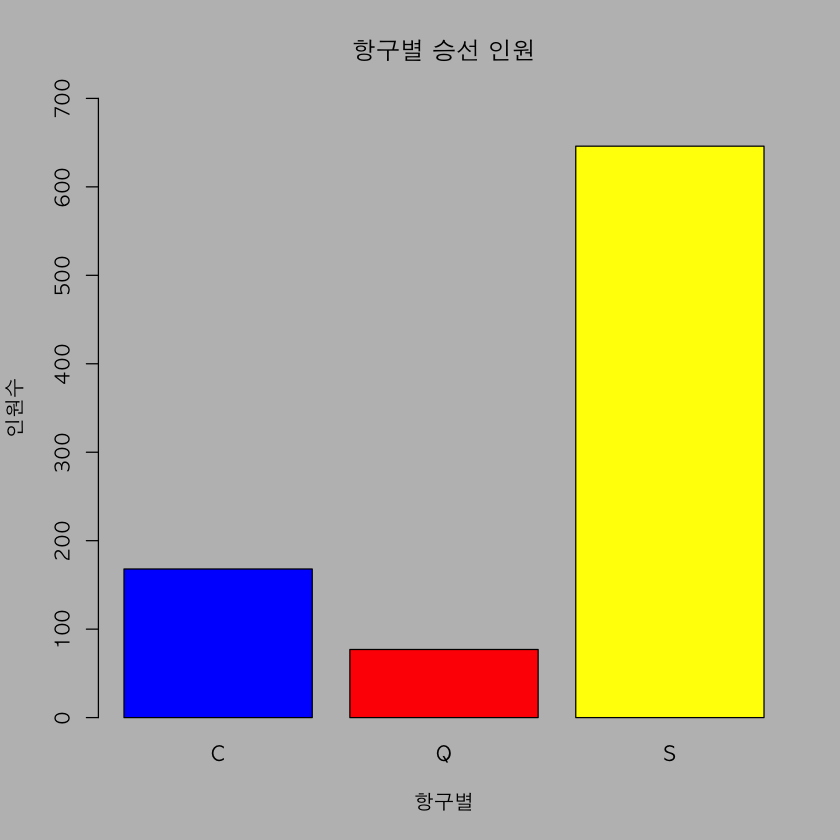

In [63]:
# 항구별 승선 인원
par(family = "AppleGothic" ,bg="gray")
options(warn = -1)


barplot(table(train_df$Embarked),
        col = c("blue",'red','yellow'),
        ylim = c(0, 700),
        ylab = "인원수",
        xlab = "항구별",
        main = "항구별 승선 인원"
       )



  0   1 
549 342 


  C   Q   S 
168  77 646 

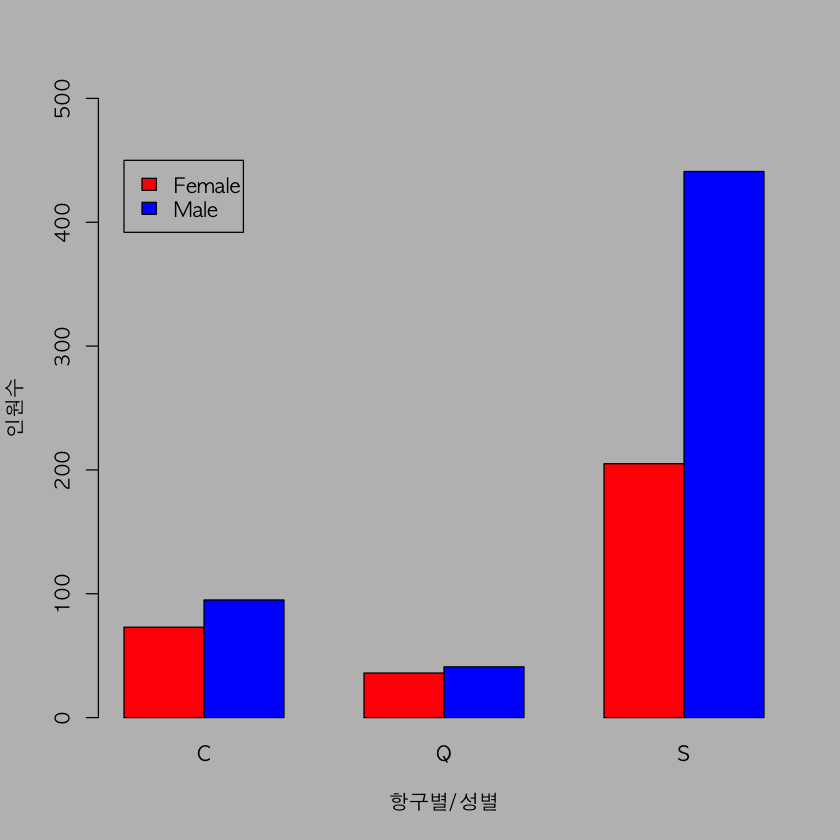

In [64]:
# 항구별 성별 승선 인원
par(family = "AppleGothic" ,bg="gray")
options(warn = -1)


barplot(table (train_df$Sex,train_df$Embarked),
        beside = T,
        ylim = c(0, 500),
        ylab = "인원수",
        xlab = "항구별/성별",
        col = c("red",'blue')
       )

legend(1,450,
       c("Female","Male"),
       #fill : 네모박스색깔
       fill = c("red","blue"),
#      lty = c(1,1)
      )
table(train_df$Survived)
table(train_df$Embarked)

C항구는 약간차이,Q항구는 비슷,   
S항구는 차이 많다(인원수도 많아) <-- 그래서 관련있는것 자료다.

In [65]:
# 항구별 승선 인원

In [66]:
str(train_df)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 5 6 7 8 13 14 15 17 19 ...
 $ Survived   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Pclass     : int  3 3 3 1 3 3 3 3 3 3 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 16 559 520 629 734 29 847 687 846 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 2 2 2 2 2 2 1 2 1 ...
 $ Age        : num  22 35 NA 54 2 20 39 14 2 31 ...
 $ SibSp      : int  1 0 0 0 3 0 1 0 4 1 ...
 $ Parch      : int  0 0 0 0 1 0 5 0 1 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 473 276 86 396 536 334 414 481 302 ...
 $ Fare       : num  7.25 8.05 8.46 51.86 21.07 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 1 1 131 1 1 1 1 1 1 ...
 $ Embarked   : Factor w/ 3 levels "C","Q","S": 3 3 2 3 3 3 3 3 2 3 ...


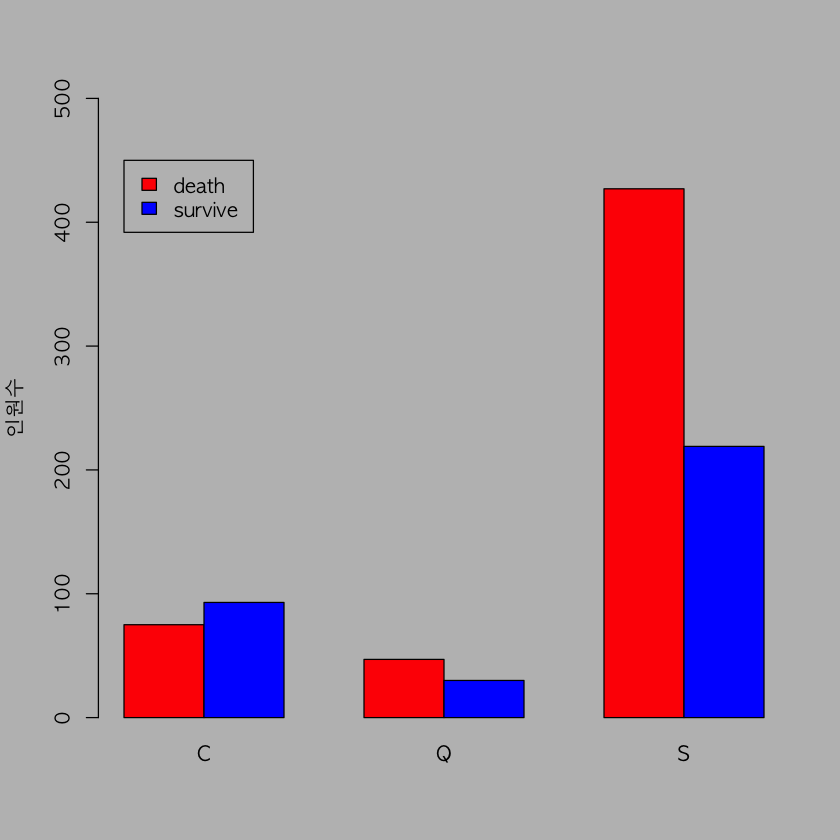

In [67]:
# 항구별 생존 인원
par(family = "AppleGothic" ,bg="gray")
options(warn = -1)


barplot(table(train_df$Survived, train_df$Embarked),
        beside = T,
        ylim = c(0, 500),
        ylab = "인원수",
        col = c("red",'blue')
       )

legend(1,450,
       c("death","survive"),
       #fill : 네모박스색깔
       fill = c("red","blue"),
#      lty = c(1,1)
      )

만들어보기

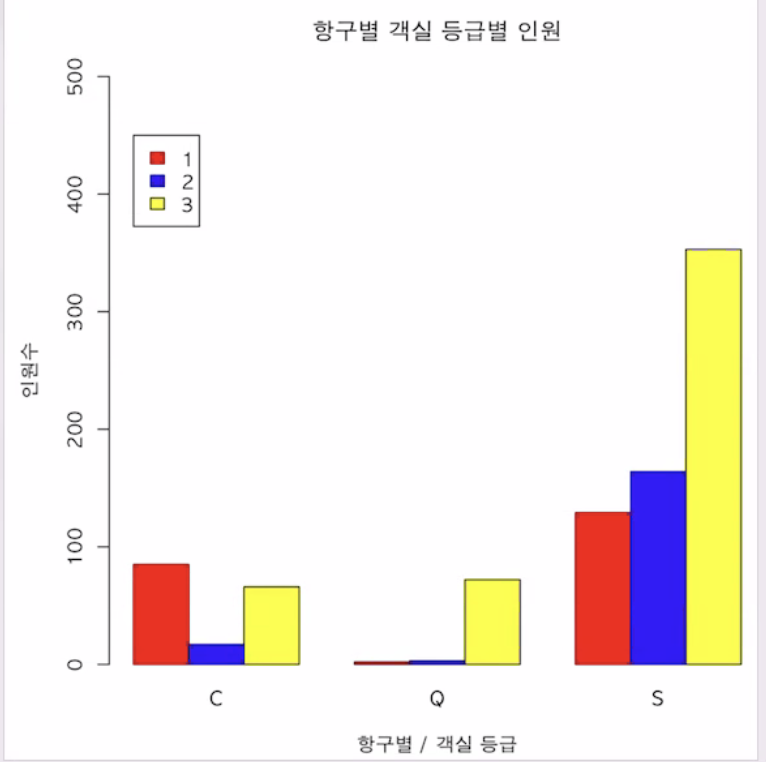

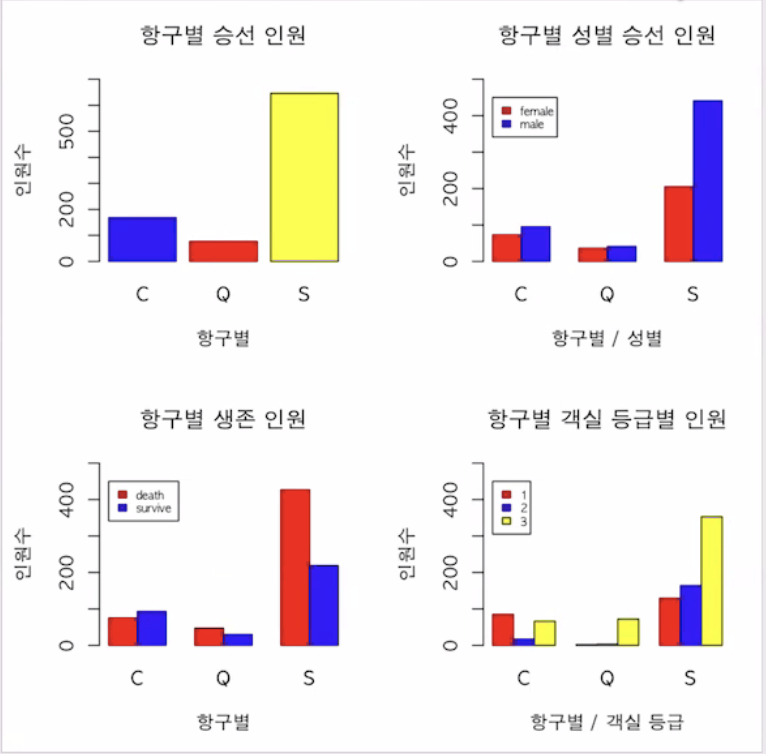

# RamdonForest로 예측모델 생성

In [68]:
# 복사본
train_df_T <- train_df

In [69]:
#예측을 위한 컬럼 확인
target_col <- c("Survived","Sex","Pclass","Embarked")
head(train_df_T[,target_col])

Survived,Sex,Pclass,Embarked
0,male,3,S
0,male,3,S
0,male,3,Q
0,male,1,S
0,male,3,S
0,male,3,S


In [70]:
#Sex 컬럼을 숫자로 전환
train_df_T$SexCode[train_df_T$Sex == 'male'] <- 0
train_df_T$SexCode[train_df_T$Sex == 'female'] <- 1
head(train_df_T[,target_col])

Survived,Sex,Pclass,Embarked
0,male,3,S
0,male,3,S
0,male,3,Q
0,male,1,S
0,male,3,S
0,male,3,S


In [71]:
# Sex컬럼 삭제
train_df_T <- subset(train_df_T, select = -Sex)
head(target_col)

[1] "Survived" "Sex"      "Pclass"   "Embarked"

In [72]:
target_col <- c("Survived","SexCode","Pclass","Embarked")
head(train_df_T[,target_col])

Survived,SexCode,Pclass,Embarked
0,0,3,S
0,0,3,S
0,0,3,Q
0,0,1,S
0,0,3,S
0,0,3,S


### Embarked를 숫자로 전환  
C=0,S=1,Q=2 -> 맞긴 맞지만 좋은 생각이 아니다.  
2*S = Q?  
S + S = Q?  

### One=Hot Encoding방법
> C == [1,0,0]  
> S == [0,1,0]  
>Q == [0,0,1]  

처럼 행렬로 만들면 덧셈과 뺄셈에 대해 각각 계산에 굉장히 안전해 진다.  
R은 내부적으로 1은 True, 0은 False.

In [73]:
train_df_T$Embarked_C = train_df_T$Embarked == "C"
train_df_T$Embarked_S = train_df_T$Embarked == "S"
train_df_T$Embarked_Q = train_df_T$Embarked == "Q"

head(train_df_T[c('Embarked','Embarked_C','Embarked_S','Embarked_Q')])

Embarked,Embarked_C,Embarked_S,Embarked_Q
S,FALSE,TRUE,FALSE
S,FALSE,TRUE,FALSE
Q,FALSE,FALSE,TRUE
S,FALSE,TRUE,FALSE
S,FALSE,TRUE,FALSE
S,FALSE,TRUE,FALSE


In [74]:
target_col = c("Survived","Pclass","SexCode",'Embarked_C','Embarked_S','Embarked_Q')
head(train_df_T[,target_col])

Survived,Pclass,SexCode,Embarked_C,Embarked_S,Embarked_Q
0,3,0,FALSE,TRUE,FALSE
0,3,0,FALSE,TRUE,FALSE
0,3,0,FALSE,FALSE,TRUE
0,1,0,FALSE,TRUE,FALSE
0,3,0,FALSE,TRUE,FALSE
0,3,0,FALSE,TRUE,FALSE


In [75]:
train_data <- train_df_T[,target_col]

In [76]:
head(train_data )

Survived,Pclass,SexCode,Embarked_C,Embarked_S,Embarked_Q
0,3,0,FALSE,TRUE,FALSE
0,3,0,FALSE,TRUE,FALSE
0,3,0,FALSE,FALSE,TRUE
0,1,0,FALSE,TRUE,FALSE
0,3,0,FALSE,TRUE,FALSE
0,3,0,FALSE,TRUE,FALSE


In [77]:
str(train_data)

'data.frame':	891 obs. of  6 variables:
 $ Survived  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Pclass    : int  3 3 3 1 3 3 3 3 3 3 ...
 $ SexCode   : num  0 0 0 0 0 0 0 1 0 1 ...
 $ Embarked_C: logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Embarked_S: logi  TRUE TRUE FALSE TRUE TRUE TRUE ...
 $ Embarked_Q: logi  FALSE FALSE TRUE FALSE FALSE FALSE ...


In [78]:
#Sampling
library(caret)
set.seed(1234)
samp <- createDataPartition(train_data$Survived, p=0.7,list=F)

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [79]:
#학습용
data.train <-train_data[samp,]

In [80]:
#검증용
data.test <-train_data[-samp,]

In [81]:
library(randomForest)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin

The following object is masked from ‘package:dplyr’:

    combine



In [82]:
#학습시키기
rf <- randomForest(Survived ~., data=data.train, ntree = 100)

In [83]:
#문제와 정답
x <- subset(data.test, select = -Survived)
y <- data.test$Survived

In [84]:
#검증하기
pred <- predict(rf,x)
head(pred)

#주관식이여서 답이 이렇게 나오네\

5         6         7         8         9        16 
0.2142584 0.2142584 0.2142584 0.3813423 0.2311170 0.4489231

> int data라서 문제를 주관식으로 품.  
> 0~1 사이의 함수를 보여주는 함수 sigmoid함수

In [85]:
# 주관식 답들을 2지선다? 로 바꿔줘
pred[pred <= 0.5] <- 0
pred[pred >  0.5] <- 1
head(pred)

5  6  7  8  9 16 
 0  0  0  0  0  0

In [86]:
mean(pred == y)

[1] 0.7790262

--- 
# Survived를 Factor로 변환후에 ramdomForest 실행

In [87]:
data.train$Survived <- as.factor(data.train$Survived)
data.test$Survived <- as.factor(data.test$Survived)

In [88]:
rf <- randomForest(Survived ~., data=data.train, ntree = 100)

In [89]:
x <- subset(data.test, select = -Survived)
y <- data.test$Survived

In [90]:
pred <- predict(rf,x)
head(pred)

5  6  7  8  9 16 
 0  0  0  0  0  0 
Levels: 0 1

In [91]:
mean(pred == y)
table(pred , y)

[1] 0.7790262

    y
pred   0   1
   0 156  49
   1  10  52

---

In [92]:
library(caret)
library(nnet)
library(party)
library(randomForest)
library(e1071)

Loading required package: grid
Loading required package: mvtnorm
Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: sandwich


In [93]:
head(train_data)

Survived,Pclass,SexCode,Embarked_C,Embarked_S,Embarked_Q
0,3,0,FALSE,TRUE,FALSE
0,3,0,FALSE,TRUE,FALSE
0,3,0,FALSE,FALSE,TRUE
0,1,0,FALSE,TRUE,FALSE
0,3,0,FALSE,TRUE,FALSE
0,3,0,FALSE,TRUE,FALSE


In [94]:
set.seed(1234)
samp <- createDataPartition(train_data$Survived, p=0.7,list=F)
data.train <-train_data[samp,]
data.test <-train_data[-samp,]
rf <- randomForest(Survived ~., data=data.train, ntree = 100)
pred <- predict(rf,x)
head(pred)

5         6         7         8         9        16 
0.2142584 0.2142584 0.2142584 0.3813423 0.2311170 0.4489231

In [95]:
data.train$Survived <- as.factor(data.train$Survived)
data.test$Survived <- as.factor(data.test$Survived)
rf <- randomForest(Survived ~., data=data.train, ntree = 100)
x <- subset(data.test, select = -Survived)
y <- data.test$Survived
pred <- predict(rf,x)
head(pred)
mean(pred == y)
table(pred , y)

5  6  7  8  9 16 
 0  0  0  0  0  0 
Levels: 0 1

[1] 0.7790262

    y
pred   0   1
   0 156  49
   1  10  52

In [96]:
model.nnet <- nnet(Survived ~ ., data=data.train, size=7)
model.ctree <- ctree(Survived ~., data=data.train)
model.rf <- randomForest(Survived ~ ., data=data.train, ntree = 100)
model.svm <- svm(Survived ~ . , data=data.train)
model <- multinom(Survived ~., data=data.train)

인pred <- predict(model.nnet, x, type = "raw")
의pred <- predict(model.ctree, x)
Rpred <- predict(model.rf, x)
Spred <- predict(model.svm, x)
로pred <- predict(model, x)

인pred[인pred <= 0.5] <- 0
인pred[인pred >  0.5] <- 1
#head(인pred)

의pred[의pred <= 0.5] <- 0
의pred[의pred >  0.5] <- 1
#head(의pred)

Rpred[Rpred <= 0.5] <- 0
Rpred[Rpred >  0.5] <- 1
#head(Rpred)

Spred[Spred <= 0.5] <- 0
Spred[Spred >  0.5] <- 1
#head(Spred)


로pred[로pred <= 0.5] <- 0
로pred[로pred >  0.5] <- 1
#head(로pred)


인공신경망 <-  mean(인pred == y)
의사결정나무 <- mean(의pred == y)
RandomForest <- mean(Rpred == y)
SVM <- mean(Spred == y)
로지스틱회귀분석 <- mean(로pred == y)

 paste("인공신경망 :", 인공신경망)
 paste("의사결정나무 :", 의사결정나무)
 paste("RandomForest :", RandomForest)
 paste("SVM :", SVM)
 paste("로지스틱회귀분석 :", 로지스틱회귀분석)

# weights:  50
initial  value 419.841485 
iter  10 value 263.259638
iter  20 value 258.186263
iter  30 value 257.383915
iter  40 value 257.316069
iter  50 value 257.313587
iter  60 value 257.312171
iter  70 value 257.308889
final  value 257.308442 
converged
# weights:  7 (6 variable)
initial  value 432.523841 
iter  10 value 280.078664
final  value 280.078633 
converged


[1] "인공신경망 : 0.779026217228464"

[1] "의사결정나무 : 0.779026217228464"

[1] "RandomForest : 0.779026217228464"

[1] "SVM : 0.779026217228464"

[1] "로지스틱회귀분석 : 0.771535580524345"

---

In [97]:
aa <- train_data

In [98]:
train_df_F <- train_df
train_df_F$family <- train_df_F$SibSp + train_df_F$Parch
head(train_df_F)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S,1
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S,0
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q,0
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,0
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S,4
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S,0


In [99]:
train_df_F$family <- 
ifelse(train_df_F$family == 0, FALSE, TRUE)
head(train_df_F)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S,TRUE
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S,FALSE
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q,FALSE
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,FALSE
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S,TRUE
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S,FALSE


In [100]:
aa$notAlone = train_df_F$family == TRUE
aa$alone = train_df_F$family == FALSE
head(aa)

Survived,Pclass,SexCode,Embarked_C,Embarked_S,Embarked_Q,notAlone,alone
0,3,0,FALSE,TRUE,FALSE,TRUE,FALSE
0,3,0,FALSE,TRUE,FALSE,FALSE,TRUE
0,3,0,FALSE,FALSE,TRUE,FALSE,TRUE
0,1,0,FALSE,TRUE,FALSE,FALSE,TRUE
0,3,0,FALSE,TRUE,FALSE,TRUE,FALSE
0,3,0,FALSE,TRUE,FALSE,FALSE,TRUE


In [109]:
set.seed(1234)
samp <- createDataPartition(aa$Survived, p=0.7,list=F)
aa.train <- aa[samp,]
aa.test <- aa[-samp,]
rf <- randomForest(Survived ~., data=aa.train, ntree = 100)
pred <- predict(rf,x)
head(pred)

5         6         7         8         9        16 
0.1318521 0.1403324 0.1749656 0.4680011 0.1988318 0.3808615

In [111]:
aa.train$Survived <- as.factor(aa.train$Survived)
aa.test$Survived <- as.factor(aa.test$Survived)
x <- subset(aa.test, select = -Survived)
y <- aa.test$Survived

pred[pred <= 0.5] <- 0
pred[pred >  0.5] <- 1
head(pred)

mean(pred == y)
table(pred , y)

5  6  7  8  9 16 
 0  0  0  0  0  0

[1] 0.7752809

    y
pred   0   1
   0 154  48
   1  12  53

In [103]:
model.nnet <- nnet(Survived ~ ., data=aa.train, size=7)
model.ctree <- ctree(Survived ~., data=aa.train)
model.rf <- randomForest(Survived ~ ., data=aa.train, ntree = 100)
model.svm <- svm(Survived ~ . , data=aa.train)
model <- multinom(Survived ~., data=aa.train)

인pred <- predict(model.nnet, x, type = "raw")
의pred <- predict(model.ctree, x)
Rpred <- predict(model.rf, x)
Spred <- predict(model.svm, x)
로pred <- predict(model, x)

인pred[인pred <= 0.5] <- 0
인pred[인pred >  0.5] <- 1
#head(인pred)

의pred[의pred <= 0.5] <- 0
의pred[의pred >  0.5] <- 1
#head(의pred)

Rpred[Rpred <= 0.5] <- 0
Rpred[Rpred >  0.5] <- 1
#head(Rpred)

Spred[Spred <= 0.5] <- 0
Spred[Spred >  0.5] <- 1
#head(Spred)


로pred[로pred <= 0.5] <- 0
로pred[로pred >  0.5] <- 1
#head(로pred)


인공신경망 <-  mean(인pred == y)
의사결정나무 <- mean(의pred == y)
RandomForest <- mean(Rpred == y)
SVM <- mean(Spred == y)
로지스틱회귀분석 <- mean(로pred == y)

 paste("인공신경망 :", 인공신경망)
 paste("의사결정나무 :", 의사결정나무)
 paste("RandomForest :", RandomForest)
 paste("SVM :", SVM)
 paste("로지스틱회귀분석 :", 로지스틱회귀분석)

# weights:  64
initial  value 409.704756 
iter  10 value 267.574754
iter  20 value 252.078427
iter  30 value 248.692880
iter  40 value 247.687874
iter  50 value 247.138689
iter  60 value 246.903736
iter  70 value 246.795889
iter  80 value 246.768608
iter  90 value 246.755941
iter 100 value 246.749656
final  value 246.749656 
stopped after 100 iterations
# weights:  9 (8 variable)
initial  value 432.523841 
iter  10 value 279.733618
final  value 279.648383 
converged


[1] "인공신경망 : 0.760299625468165"

[1] "의사결정나무 : 0.779026217228464"

[1] "RandomForest : 0.771535580524345"

[1] "SVM : 0.779026217228464"

[1] "로지스틱회귀분석 : 0.771535580524345"

In [104]:
target_col2 <- target_col

In [105]:
target_col2 = c("Survived","Pclass","SexCode",'Embarked_C','Embarked_S','Embarked_Q','SibSp','Parch')
train_data <- train_df_T[,target_col2]
train_data <- arrange(train_data,Survived)
train_data$Family <- train_data$SibSp+train_data$Parch+1
train_data <- subset(train_data, select = -SibSp)
train_data <- subset(train_data, select = -Parch)
head(train_data)

Survived,Pclass,SexCode,Embarked_C,Embarked_S,Embarked_Q,Family
0,3,0,FALSE,TRUE,FALSE,2
0,3,0,FALSE,TRUE,FALSE,1
0,3,0,FALSE,FALSE,TRUE,1
0,1,0,FALSE,TRUE,FALSE,1
0,3,0,FALSE,TRUE,FALSE,5
0,3,0,FALSE,TRUE,FALSE,1


In [115]:
aa <- train_data

In [116]:
set.seed(1234)
samp <- createDataPartition(aa$Survived, p=0.7,list=F)
aa.train <- aa[samp,]
aa.test <- aa[-samp,]
head(pred)
aa.train$Survived <- as.factor(aa.train$Survived)
aa.test$Survived <- as.factor(aa.test$Survived)
x <- subset(aa.test, select = -Survived)
y <- aa.test$Survived
pred <- predict(rf,x)

pred[pred <= 0.5] <- 0
pred[pred >  0.5] <- 1
head(pred)


mean(pred == y)
table(pred , y)

5  6  7  8  9 16 
 0  0  0  0  0  0

5  6  7  8  9 16 
 0  0  0  0  0  0

[1] 0.7752809

    y
pred   0   1
   0 154  48
   1  12  53

In [117]:
model.nnet <- nnet(Survived ~ ., data=aa.train, size=7)
model.ctree <- ctree(Survived ~., data=aa.train)
model.rf <- randomForest(Survived ~ ., data=aa.train, ntree = 100)
model.svm <- svm(Survived ~ . , data=aa.train)
model <- multinom(Survived ~., data=aa.train)

인pred <- predict(model.nnet, x, type = "raw")
의pred <- predict(model.ctree, x)
Rpred <- predict(model.rf, x)
Spred <- predict(model.svm, x)
로pred <- predict(model, x)

인pred[인pred <= 0.5] <- 0
인pred[인pred >  0.5] <- 1
#head(인pred)

의pred[의pred <= 0.5] <- 0
의pred[의pred >  0.5] <- 1
#head(의pred)

Rpred[Rpred <= 0.5] <- 0
Rpred[Rpred >  0.5] <- 1
#head(Rpred)

Spred[Spred <= 0.5] <- 0
Spred[Spred >  0.5] <- 1
#head(Spred)


로pred[로pred <= 0.5] <- 0
로pred[로pred >  0.5] <- 1
#head(로pred)


인공신경망 <-  mean(인pred == y)
의사결정나무 <- mean(의pred == y)
RandomForest <- mean(Rpred == y)
SVM <- mean(Spred == y)
로지스틱회귀분석 <- mean(로pred == y)

 paste("인공신경망 :", 인공신경망)
 paste("의사결정나무 :", 의사결정나무)
 paste("RandomForest :", RandomForest)
 paste("SVM :", SVM)
 paste("로지스틱회귀분석 :", 로지스틱회귀분석)

# weights:  57
initial  value 463.117218 
iter  10 value 276.399833
iter  20 value 260.894054
iter  30 value 249.208277
iter  40 value 244.777420
iter  50 value 239.934549
iter  60 value 239.705989
iter  70 value 239.692613
iter  80 value 239.666578
iter  90 value 239.535853
iter 100 value 239.396280
final  value 239.396280 
stopped after 100 iterations
# weights:  8 (7 variable)
initial  value 432.523841 
iter  10 value 278.995932
final  value 278.984792 
converged


[1] "인공신경망 : 0.775280898876405"

[1] "의사결정나무 : 0.779026217228464"

[1] "RandomForest : 0.779026217228464"

[1] "SVM : 0.782771535580524"

[1] "로지스틱회귀분석 : 0.782771535580524"

In [ ]:
'인공신경망 : 0.760299625468165'
'의사결정나무 : 0.779026217228464'
'RandomForest : 0.771535580524345'
'SVM : 0.779026217228464'
'로지스틱회귀분석 : 0.771535580524345'